# Exploratory Data Analysis of Crime/Arrest Data

Source:
https://data.cityofnewyork.us/Public-Safety/NYC-crime/qb7u-rbmr/data (crime)  
https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc/about_data (arrest)  

EDA Rundown
- Filter out what dataset to use
- Filter out uncessary columns
- Address invalid/missing values
- Manipulate values
- Analyze trends between certain features
- Visualize these trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime_unclean = pd.read_csv("Datasets/CrimeData/crime_shortened_data.csv")
print(crime_unclean.columns, crime_unclean.shape)

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PD_CD', 'PD_DESC', 'PREM_TYP_DESC',
       'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object') (182810, 28)


# columns to remove

- haddevelop
- housing
- jurisdiciton
- ky_cd
- parks_nm
- rpt_dt
- station
- transit_district
- patrol_boro
- pd, pd_desc
- transit district


In [3]:
# remove_col = ['HADEVELOPT','HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD','PARKS_NM', 'PATROL_BORO','TRANSIT_DISTRICT']
# crime_unclean.drop(remove_col, axis=1, inplace=True)
# crime_unclean.shape

In [4]:
crime_unclean.dtypes

CMPLNT_NUM                    int64
ADDR_PCT_CD                   int64
BORO_NM                      object
CMPLNT_FR_DT                 object
CMPLNT_FR_TM                 object
CMPLNT_TO_DT                 object
CMPLNT_TO_TM                 object
CRM_ATPT_CPTD_CD             object
LAW_CAT_CD                   object
LOC_OF_OCCUR_DESC            object
OFNS_DESC                    object
PD_CD                       float64
PD_DESC                      object
PREM_TYP_DESC                object
RPT_DT                       object
STATION_NAME                 object
SUSP_AGE_GROUP               object
SUSP_RACE                    object
SUSP_SEX                     object
VIC_AGE_GROUP                object
VIC_RACE                     object
VIC_SEX                      object
X_COORD_CD                  float64
Y_COORD_CD                  float64
Latitude                    float64
Longitude                   float64
Lat_Lon                      object
New Georeferenced Column    

In [5]:
crime_unclean.isna().sum()
crime_unclean = crime_unclean.dropna()



In [6]:
crime_unclean

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,...,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,288019777,123,STATEN ISLAND,2024-06-05,15:00:00,06/05/2024,15:30:00,COMPLETED,MISDEMEANOR,FRONT OF,...,U,25-44,WHITE,F,924768.0,134938.0,40.536852,-74.213994,"(40.536852, -74.213994)",POINT (-74.213994 40.536852)
1,291485031,123,STATEN ISLAND,2024-08-09,12:00:00,08/10/2024,13:30:00,COMPLETED,FELONY,INSIDE,...,U,25-44,ASIAN / PACIFIC ISLANDER,M,924010.0,137020.0,40.542560,-74.216738,"(40.54256, -74.216738)",POINT (-74.216738 40.54256)
2,289124020,121,STATEN ISLAND,2024-06-26,09:25:00,06/26/2024,09:34:00,COMPLETED,MISDEMEANOR,INSIDE,...,F,UNKNOWN,UNKNOWN,D,947007.0,171330.0,40.636860,-74.134187,"(40.63686, -74.134187)",POINT (-74.134187 40.63686)
3,289932543,122,STATEN ISLAND,2024-07-11,17:45:00,07/11/2024,17:56:00,COMPLETED,MISDEMEANOR,(null),...,M,UNKNOWN,UNKNOWN,E,952994.0,151611.0,40.582758,-74.112525,"(40.58275811372917, -74.1125254092425)",POINT (-74.1125254092425 40.58275811372917)
4,293061371,120,STATEN ISLAND,2024-09-10,14:15:00,09/10/2024,14:20:00,COMPLETED,MISDEMEANOR,INSIDE,...,(null),UNKNOWN,UNKNOWN,D,948498.0,162493.0,40.612610,-74.128769,"(40.61261, -74.128769)",POINT (-74.128769 40.61261)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182805,291958084,101,QUEENS,2024-08-16,13:00:00,08/16/2024,13:15:00,COMPLETED,VIOLATION,INSIDE,...,F,25-44,BLACK,F,1053146.0,160736.0,40.607594,-73.751871,"(40.607594, -73.751871)",POINT (-73.751871 40.607594)
182806,292459204,105,QUEENS,2024-08-26,14:30:00,08/26/2024,14:47:00,COMPLETED,VIOLATION,(null),...,U,45-64,BLACK,F,1060282.0,188319.0,40.683242,-73.725863,"(40.68324233051407, -73.72586270028577)",POINT (-73.72586270028577 40.68324233051407)
182807,288333679,105,QUEENS,2024-06-08,10:30:00,06/08/2024,11:00:00,COMPLETED,VIOLATION,FRONT OF,...,M,45-64,BLACK,F,1057738.0,204079.0,40.726529,-73.734865,"(40.7265293769835, -73.7348645378882)",POINT (-73.7348645378882 40.7265293769835)
182808,291946590,105,QUEENS,2024-08-19,20:42:00,08/19/2024,20:50:00,COMPLETED,MISDEMEANOR,(null),...,M,45-64,BLACK,M,1057637.0,201157.0,40.718502,-73.735259,"(40.718501800070065, -73.73525943158317)",POINT (-73.73525943158317 40.718501800070065)


In [7]:
crime_unclean['CMPLNT_FR_DT'].dtypes

dtype('O')

Need to trim the dataset, will filter by dates only after June 1st, 2024

In [8]:
# crime_unclean['CMPLNT_FR_DT'] = pd.to_datetime(crime_unclean['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')
# # Filter rows with dates from 2020 onwards
# # crime_unclean['CMPLNT_FR_DT'].dtypes
# filtered_df = crime_unclean[crime_unclean['CMPLNT_FR_DT'] >= '2024-06-01']


In [9]:
# filtered_df.sort_values(by='CMPLNT_FR_DT')


The variables we want to work are primarily focused around location and the severity/occurences of crimes

In [10]:
crime_unclean

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,...,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,288019777,123,STATEN ISLAND,2024-06-05,15:00:00,06/05/2024,15:30:00,COMPLETED,MISDEMEANOR,FRONT OF,...,U,25-44,WHITE,F,924768.0,134938.0,40.536852,-74.213994,"(40.536852, -74.213994)",POINT (-74.213994 40.536852)
1,291485031,123,STATEN ISLAND,2024-08-09,12:00:00,08/10/2024,13:30:00,COMPLETED,FELONY,INSIDE,...,U,25-44,ASIAN / PACIFIC ISLANDER,M,924010.0,137020.0,40.542560,-74.216738,"(40.54256, -74.216738)",POINT (-74.216738 40.54256)
2,289124020,121,STATEN ISLAND,2024-06-26,09:25:00,06/26/2024,09:34:00,COMPLETED,MISDEMEANOR,INSIDE,...,F,UNKNOWN,UNKNOWN,D,947007.0,171330.0,40.636860,-74.134187,"(40.63686, -74.134187)",POINT (-74.134187 40.63686)
3,289932543,122,STATEN ISLAND,2024-07-11,17:45:00,07/11/2024,17:56:00,COMPLETED,MISDEMEANOR,(null),...,M,UNKNOWN,UNKNOWN,E,952994.0,151611.0,40.582758,-74.112525,"(40.58275811372917, -74.1125254092425)",POINT (-74.1125254092425 40.58275811372917)
4,293061371,120,STATEN ISLAND,2024-09-10,14:15:00,09/10/2024,14:20:00,COMPLETED,MISDEMEANOR,INSIDE,...,(null),UNKNOWN,UNKNOWN,D,948498.0,162493.0,40.612610,-74.128769,"(40.61261, -74.128769)",POINT (-74.128769 40.61261)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182805,291958084,101,QUEENS,2024-08-16,13:00:00,08/16/2024,13:15:00,COMPLETED,VIOLATION,INSIDE,...,F,25-44,BLACK,F,1053146.0,160736.0,40.607594,-73.751871,"(40.607594, -73.751871)",POINT (-73.751871 40.607594)
182806,292459204,105,QUEENS,2024-08-26,14:30:00,08/26/2024,14:47:00,COMPLETED,VIOLATION,(null),...,U,45-64,BLACK,F,1060282.0,188319.0,40.683242,-73.725863,"(40.68324233051407, -73.72586270028577)",POINT (-73.72586270028577 40.68324233051407)
182807,288333679,105,QUEENS,2024-06-08,10:30:00,06/08/2024,11:00:00,COMPLETED,VIOLATION,FRONT OF,...,M,45-64,BLACK,F,1057738.0,204079.0,40.726529,-73.734865,"(40.7265293769835, -73.7348645378882)",POINT (-73.7348645378882 40.7265293769835)
182808,291946590,105,QUEENS,2024-08-19,20:42:00,08/19/2024,20:50:00,COMPLETED,MISDEMEANOR,(null),...,M,45-64,BLACK,M,1057637.0,201157.0,40.718502,-73.735259,"(40.718501800070065, -73.73525943158317)",POINT (-73.73525943158317 40.718501800070065)


In [11]:
crime_unclean["LOC_OF_OCCUR_DESC"].unique()

array(['FRONT OF', 'INSIDE', '(null)', 'REAR OF', 'OPPOSITE OF'],
      dtype=object)

In [12]:
crime_unclean = crime_unclean.replace('(null)', 'not available')

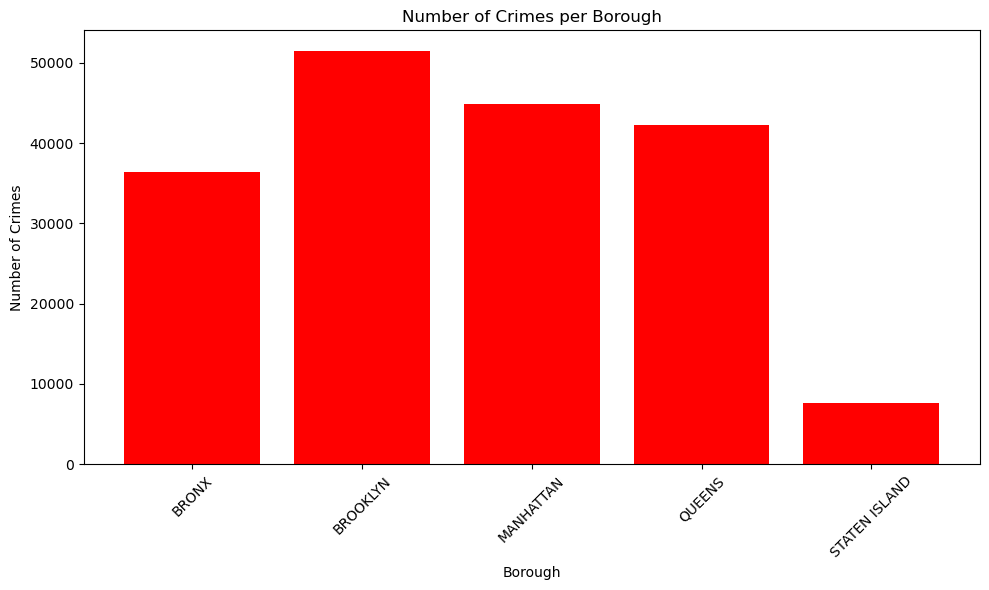

In [14]:
crime_unclean["OFNS_DESC"].unique()

array(['ASSAULT 3 & RELATED OFFENSES', 'GRAND LARCENY', 'PETIT LARCENY',
       'VEHICLE AND TRAFFIC LAWS', 'HARRASSMENT 2', 'FELONY ASSAULT',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFF. AGNST PUB ORD SENSBLTY &',
       'CRIMINAL MISCHIEF & RELATED OF', 'BURGLARY', 'CRIMINAL TRESPASS',
       'MISCELLANEOUS PENAL LAW', 'UNAUTHORIZED USE OF A VEHICLE',
       'DANGEROUS DRUGS', 'ADMINISTRATIVE CODE', 'ROBBERY',
       'OTHER STATE LAWS', 'THEFT-FRAUD', 'RAPE',
       'GRAND LARCENY OF MOTOR VEHICLE', 'KIDNAPPING & RELATED OFFENSES',
       'DANGEROUS WEAPONS', 'FORGERY', 'PROSTITUTION & RELATED OFFENSES',
       'FRAUDS', 'POSSESSION OF STOLEN PROPERTY', 'SEX CRIMES',
       'OFFENSES AGAINST THE PERSON', 'PETIT LARCENY OF MOTOR VEHICLE',
       'ARSON', 'INTOXICATED & IMPAIRED DRIVING',
       'OTHER STATE LAWS (NON PENAL LAW)',
       'OTHER OFFENSES RELATED TO THEFT', 'CANNABIS RELATED OFFENSES',
       'OFFENSES INVOLVING FRAUD', 'ALCOHOLIC BEVERAGE CONTROL LAW',
       "BURGLAR

In [15]:
category_mapping = {
    'ASSAULT 3 & RELATED OFFENSES': 'Violent Crime',
    'FELONY ASSAULT': 'Violent Crime',
    'ROBBERY': 'Violent Crime',
    'RAPE': 'Violent Crime',
    'KIDNAPPING & RELATED OFFENSES': 'Violent Crime',
    'SEX CRIMES': 'Violent Crime',
    'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'Violent Crime',
    'OFFENSES AGAINST THE PERSON': 'Violent Crime',
    'HARRASSMENT 2': 'Violent Crime',
    'CHILD ABANDONMENT/NON SUPPORT 1': 'Violent Crime',
    'ESCAPE 3': 'Violent Crime',

    'GRAND LARCENY': 'Property Crime',
    'PETIT LARCENY': 'Property Crime',
    'GRAND LARCENY OF MOTOR VEHICLE': 'Property Crime',
    'PETIT LARCENY OF MOTOR VEHICLE': 'Property Crime',
    'POSSESSION OF STOLEN PROPERTY': 'Property Crime',
    'BURGLARY': 'Property Crime',
    'CRIMINAL TRESPASS': 'Property Crime',
    'CRIMINAL MISCHIEF & RELATED OF': 'Property Crime',
    'ARSON': 'Property Crime',
    'THEFT-FRAUD': 'Property Crime',
    'OTHER OFFENSES RELATED TO THEFT': 'Property Crime',
    "BURGLAR'S TOOLS": 'Property Crime',
    
    'VEHICLE AND TRAFFIC LAWS': 'Traffic Offenses',
    'UNAUTHORIZED USE OF A VEHICLE': 'Traffic Offenses',
    'INTOXICATED & IMPAIRED DRIVING': 'Traffic Offenses',
    'INTOXICATED/IMPAIRED DRIVING': 'Traffic Offenses',
    'OTHER TRAFFIC INFRACTION': 'Traffic Offenses',
    'OFFENSES AGAINST PUBLIC SAFETY': 'Traffic Offenses',

    'DANGEROUS DRUGS': 'Drug-Related Crimes',
    'CANNABIS RELATED OFFENSES': 'Drug-Related Crimes',
    'ALCOHOLIC BEVERAGE CONTROL LAW': 'Drug-Related Crimes',
    
    'FRAUDS': 'Fraud and Financial Crimes',
    'FRAUDULENT ACCOSTING': 'Fraud and Financial Crimes',
    'THEFT-FRAUD': 'Fraud and Financial Crimes',
    'FORGERY': 'Fraud and Financial Crimes',
    'OFFENSES INVOLVING FRAUD': 'Fraud and Financial Crimes',

    'DANGEROUS WEAPONS': 'Weapons and Dangerous Items',
    'UNLAWFUL POSS. WEAP. ON SCHOOL': 'Weapons and Dangerous Items',

    'MISCELLANEOUS PENAL LAW': 'Miscellaneous Crimes',
    'DISORDERLY CONDUCT': 'Miscellaneous Crimes',
    'GAMBLING': 'Miscellaneous Crimes',
    'JOSTLING': 'Miscellaneous Crimes',
    'LOITERING/GAMBLING (CARDS, DIC': 'Miscellaneous Crimes',
    'NEW YORK CITY HEALTH CODE': 'Miscellaneous Crimes',
    'ADMINISTRATIVE CODE': 'Miscellaneous Crimes',
    'ANTICIPATORY OFFENSES': 'Miscellaneous Crimes',

    'OTHER STATE LAWS': 'Non-NYPD Jurisdiction Offenses',
    'OTHER STATE LAWS (NON PENAL LAW)': 'Non-NYPD Jurisdiction Offenses',

    'OFFENSES AGAINST PUBLIC ADMINI': 'Public Administration and Safety Offenses',
    'OFF. AGNST PUB ORD SENSBLTY &': 'Public Administration and Safety Offenses',
    'OFFENSES AGAINST PUBLIC SAFETY': 'Public Administration and Safety Offenses',
    'PROSTITUTION & RELATED OFFENSES': 'Public Administration and Safety Offenses',
    'OFFENSES RELATED TO CHILDREN': 'Public Administration and Safety Offenses',

    'not available': 'Not Available'
}

# Apply the mapping to the 'offense_description' column
crime_unclean['OFNS_DESC'] = crime_unclean['OFNS_DESC'].map(category_mapping).fillna(crime_unclean['OFNS_DESC'])

In [67]:
crime_unclean = crime_unclean[crime_unclean['OFNS_DESC'] != 'not available'].reset_index(drop=True)
crime_unclean = crime_unclean[crime_unclean['BORO_NM'] != 'not available'].reset_index(drop=True)

crime_clean = crime_unclean



In [17]:
crime_unclean["OFNS_DESC"].unique()

array(['Violent Crime', 'Property Crime', 'Traffic Offenses',
       'Public Administration and Safety Offenses',
       'Miscellaneous Crimes', 'Drug-Related Crimes',
       'Non-NYPD Jurisdiction Offenses', 'Fraud and Financial Crimes',
       'Weapons and Dangerous Items', 'Not Available'], dtype=object)

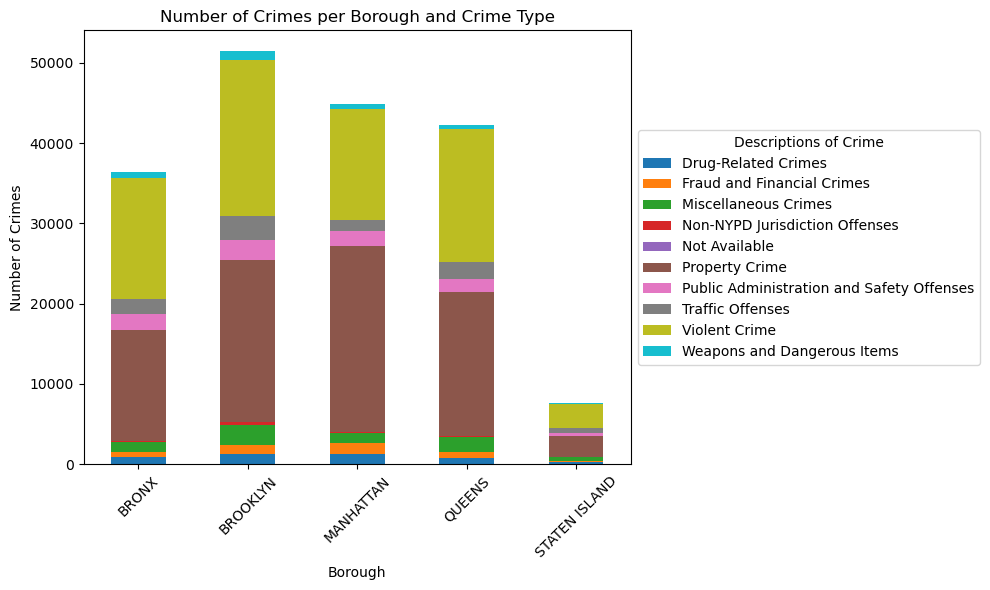

In [54]:
crime_count_by_borough_type =  crime_unclean.groupby(['BORO_NM', 'OFNS_DESC'])['CMPLNT_NUM'].count().unstack(fill_value=0)

crime_count_by_borough_type.plot(kind='bar', stacked=True, figsize=(10,6))

plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Borough and Crime Type')
plt.xticks(rotation=45)  
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Descriptions of Crime")

plt.tight_layout()

plt.show()

In [18]:
crime_unclean[0:50]

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,...,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,288019777,123,STATEN ISLAND,2024-06-05,15:00:00,06/05/2024,15:30:00,COMPLETED,MISDEMEANOR,FRONT OF,...,U,25-44,WHITE,F,924768.0,134938.0,40.536852,-74.213994,"(40.536852, -74.213994)",POINT (-74.213994 40.536852)
1,291485031,123,STATEN ISLAND,2024-08-09,12:00:00,08/10/2024,13:30:00,COMPLETED,FELONY,INSIDE,...,U,25-44,ASIAN / PACIFIC ISLANDER,M,924010.0,137020.0,40.542560,-74.216738,"(40.54256, -74.216738)",POINT (-74.216738 40.54256)
2,289124020,121,STATEN ISLAND,2024-06-26,09:25:00,06/26/2024,09:34:00,COMPLETED,MISDEMEANOR,INSIDE,...,F,UNKNOWN,UNKNOWN,D,947007.0,171330.0,40.636860,-74.134187,"(40.63686, -74.134187)",POINT (-74.134187 40.63686)
3,289932543,122,STATEN ISLAND,2024-07-11,17:45:00,07/11/2024,17:56:00,COMPLETED,MISDEMEANOR,not available,...,M,UNKNOWN,UNKNOWN,E,952994.0,151611.0,40.582758,-74.112525,"(40.58275811372917, -74.1125254092425)",POINT (-74.1125254092425 40.58275811372917)
4,293061371,120,STATEN ISLAND,2024-09-10,14:15:00,09/10/2024,14:20:00,COMPLETED,MISDEMEANOR,INSIDE,...,not available,UNKNOWN,UNKNOWN,D,948498.0,162493.0,40.612610,-74.128769,"(40.61261, -74.128769)",POINT (-74.128769 40.61261)
5,293914062,121,STATEN ISLAND,2024-09-20,19:50:00,09/20/2024,20:00:00,COMPLETED,VIOLATION,INSIDE,...,not available,25-44,WHITE HISPANIC,F,937288.0,151471.0,40.582305,-74.169067,"(40.582305, -74.169067)",POINT (-74.169067 40.582305)
6,289871396,123,STATEN ISLAND,2024-07-10,09:00:00,07/10/2024,09:50:00,COMPLETED,VIOLATION,INSIDE,...,M,45-64,ASIAN / PACIFIC ISLANDER,F,932982.0,129375.0,40.521632,-74.184399,"(40.521632, -74.184399)",POINT (-74.184399 40.521632)
7,293637635,121,STATEN ISLAND,2024-09-20,16:20:00,09/20/2024,16:22:00,COMPLETED,FELONY,not available,...,U,45-64,WHITE,M,942237.0,167171.0,40.625423,-74.151349,"(40.625422624219055, -74.1513486395006)",POINT (-74.1513486395006 40.625422624219055)
8,290789572,120,STATEN ISLAND,2024-07-28,20:30:00,07/28/2024,20:56:00,COMPLETED,MISDEMEANOR,FRONT OF,...,M,UNKNOWN,UNKNOWN,E,951790.0,171390.0,40.637044,-74.116952,"(40.637044, -74.116952)",POINT (-74.116952 40.637044)
9,290528955,121,STATEN ISLAND,2024-07-20,22:20:00,07/20/2024,22:30:00,COMPLETED,VIOLATION,INSIDE,...,M,65+,WHITE,F,939386.0,149590.0,40.577155,-74.161500,"(40.577155, -74.1615)",POINT (-74.1615 40.577155)


In [32]:

crime_unclean["BORO_NM"].unique()

array(['STATEN ISLAND', 'BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS'],
      dtype=object)

In [66]:
crime_unclean.isna().sum()

CMPLNT_NUM                  0
ADDR_PCT_CD                 0
BORO_NM                     0
CMPLNT_FR_DT                0
CMPLNT_FR_TM                0
CMPLNT_TO_DT                0
CMPLNT_TO_TM                0
CRM_ATPT_CPTD_CD            0
LAW_CAT_CD                  0
LOC_OF_OCCUR_DESC           0
OFNS_DESC                   0
PD_CD                       0
PD_DESC                     0
PREM_TYP_DESC               0
RPT_DT                      0
STATION_NAME                0
SUSP_AGE_GROUP              0
SUSP_RACE                   0
SUSP_SEX                    0
VIC_AGE_GROUP               0
VIC_RACE                    0
VIC_SEX                     0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
Lat_Lon                     0
New Georeferenced Column    0
dtype: int64

In [41]:
import plotly.express as px
import plotly.graph_objects as go


color_dict = {
        'Violent Crime': 'blue',
        'Property Crime': 'green',
        'Traffic Offenses': 'red',
        'Public Administration and Safety Offense': 'yellow',
        'Miscellaneous Crimes':'orange',
        'Drug-Related Crimes':'purple',
        'Non-NYPD Jurisdiction Offenses':'grey',
        'Fraud and Financial Crimes':'white',
        'Weapons and Dangerous Items':'black',
    }

hover_data_dict = {
    "OFNS_DESC": True,
    "BORO_NM": True, 
    "Latitude": False,
    "Longitude": False
}    

plot_labels = {
    "OFNS_DESC": "Crime",
    "BORO_NM": "Bourough"
}


fig = px.scatter_mapbox(crime_unclean, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="OFNS_DESC", 
                        color_discrete_map = color_dict,
                        size_max=20,
                        zoom=10,
                        title="Crime Density in NYC",
                        hover_data = hover_data_dict,
                        labels = plot_labels,
                        mapbox_style="carto-positron",
                        height=1000)

# Update layout for better zoom and styling
# fig.update_layout(mapbox=dict(center=dict(lat=40.7128, lon=-74.0060), zoom=10),
#                   title="Crime Density in NYC")

# import plotly.io as pio
# pio.renderers.default = 'browser'
# Show the figure
fig.show()
fig.write_html("crimemap.html")


In [40]:
import plotly.graph_objects as go

# Example DataFrame with latitude and longitude
# df = pd.DataFrame({
#     'latitude': [40.7128, 40.730610, 40.755821, 40.7610, 40.7197],
#     'longitude': [-74.0060, -73.935242, -73.984642, -73.9827, -74.0101]
# })

# Create a scatter map (no Mapbox token needed)
fig = go.Figure(go.Densitymapbox(
    lat=crime_unclean['Latitude'],
    lon=crime_unclean['Longitude'],
    z=crime_unclean['OFNS_DESC'],
    colorscale="Viridis",
    radius=10
))

fig.update_layout(
    mapbox_style="open-street-map",   # Use open street map style (no Mapbox token needed)
    mapbox_center={"lat": 40.7128, "lon": -74.0060},  # Center of the map (NYC)
    mapbox_zoom=10,                   # Zoom level
)
fig.show()
# fig.write_html("crimemap.html")


In [37]:
fig = go.Figure(go.Scattermapbox(
    lat=crime_unclean['Latitude'],
    lon=crime_unclean['Longitude'],
    mode='markers',
    marker=dict(size=9),
    text=crime_unclean['OFNS_DESC']
))

fig.update_layout(
    mapbox_style="open-street-map",  # Use OpenStreetMap instead of Mapbox
    title="NYC Points"
)

fig.show()

In [64]:
# import geopandas as gpd
# from shapely.geometry import Point

# # Load the NYC neighborhood boundaries GeoJSON file (you can replace this with a local path or URL)
# # nyc_neighborhoods = gpd.read_file('Datasets/CrimeData/nyc-neighborhoods.geo.json')  # Or use a shapefile .shp

# gdf_neighborhoods = gpd.read_file('Datasets/CrimeData/geo_export_8469395f-93c6-4216-86e1-ed98f72590b6.shp')  # or shapefile
# # Example coordinates (longitude, latitude)

# gdf_neighborhoods.head()
# coord = (-73.935242, 40.730610)  # Example: coordinates for a location in NYC

# # Convert the coordinates to a Shapely Point
# point = Point(coord)

# point_gdf = gpd.GeoDataFrame([{'geometry': point}], crs="EPSG:4326")

# # Ensure coordinate systems match
# neighborhoods = gdf_neighborhoods.to_crs("EPSG:4326")

# # Perform a spatial join to find the neighborhood
# result = gpd.sjoin(point_gdf, neighborhoods, how="left", predicate="within")

# # Display the neighborhood name
# print(result[['neighborhood_name']])  # Replace with actual column name for neighborhood

KeyError: "None of [Index(['neighborhood_name'], dtype='object')] are in the [columns]"

# merging modeling income df with crime

In [76]:
modeling_income_df = pd.read_csv("Datasets/AirbnbData/Merged_modeling_income.csv")
modeling_income_df


,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,id,host_id,...,coffee,view,average_review_sentiment_score,description_FRES_score,title_sentiment_score,host_about_sentiment_score,neighborhood_overview_score,bookings_per_year,estimated_ococcupancy_rate,log_price
0,33.123882,1976.299663,38825.366808,9.153213e+05,3.368985e+05,5.784228e+05,4.428691e+06,2015.691394,739333866230665371,3013025,...,False,False,0.000000,73.03,0.58590,0.000000,0.000000,0.00,0.000000,4.488636
1,18.532075,1990.192453,17624.192453,3.774487e+05,1.334875e+05,2.439612e+05,1.853208e+01,2015.558491,572612125615500056,358089614,...,True,False,0.479152,77.53,0.23765,0.000000,0.000000,5.04,0.069041,3.806662
2,181.050870,1990.666667,185795.860776,2.733890e+06,1.407035e+06,1.326855e+06,9.316653e+06,2015.752343,45267941,39162543,...,False,False,0.000000,0.00,0.00000,0.000000,0.000000,0.00,0.000000,4.672829
3,89.025476,1955.362911,105179.984234,4.418728e+06,1.352718e+06,3.066010e+06,2.399522e+07,2015.336281,838141198693830649,148571080,...,False,False,0.000000,0.00,0.31820,0.403333,0.000000,0.00,0.000000,4.941642
4,33.123882,1976.299663,38825.366808,9.153213e+05,3.368985e+05,5.784228e+05,4.428691e+06,2015.691394,1082660771919357919,394869975,...,False,False,0.000000,85.69,0.00000,0.000000,0.000000,0.00,0.000000,5.828946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42425,140.193167,1968.294350,168202.362681,7.680102e+06,2.220912e+06,5.459190e+06,1.401932e+02,2015.419185,1071864693430206494,343553467,...,False,False,0.000000,53.21,0.79590,0.000000,0.000000,72.00,0.986301,5.010635
42426,89.025476,1955.362911,105179.984234,4.418728e+06,1.352718e+06,3.066010e+06,2.399522e+07,2015.336281,866504897024300729,27181542,...,True,False,0.000000,46.81,0.00000,0.450050,0.054400,0.00,0.000000,5.105945
42427,89.025476,1955.362911,105179.984234,4.418728e+06,1.352718e+06,3.066010e+06,2.399522e+07,2015.336281,1100153716637050505,27181542,...,True,False,0.000000,45.59,0.00000,0.450050,0.091520,0.00,0.000000,5.480639
42428,140.193167,1968.294350,168202.362681,7.680102e+06,2.220912e+06,5.459190e+06,1.401932e+02,2015.419185,45767958,22541573,...,True,False,0.000000,37.64,0.00000,0.540733,0.304337,0.00,0.000000,6.349139


In [68]:
crime_clean.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PD_CD', 'PD_DESC', 'PREM_TYP_DESC',
       'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')

In [90]:
borough_groupby = pd.DataFrame(crime_clean.groupby("BORO_NM").agg(
        total_crimes=("CMPLNT_NUM", "count"),  
        most_common_crime=("OFNS_DESC", lambda x: x.mode()[0])  
    ).reset_index())

borough_groupby['BORO_NM'] = borough_groupby['BORO_NM'].str.title()

print(borough_groupby)


         BORO_NM  total_crimes most_common_crime
0          Bronx         36337     Violent Crime
1       Brooklyn         51467    Property Crime
2      Manhattan         44921    Property Crime
3         Queens         42280    Property Crime
4  Staten Island          7650     Violent Crime


In [91]:
print(modeling_income_df['neighbourhood_group_cleansed'].unique())
print(borough_groupby['BORO_NM'].unique())

['Brooklyn' 'Bronx' 'Manhattan' 'Queens' 'Staten Island']
['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


In [96]:
merged_df = modeling_income_df.merge(
    borough_groupby,
    how="left",  
    left_on="neighbourhood_group_cleansed", 
    right_on="BORO_NM"  
)

# Step 3: Drop unnecessary columns if needed (e.g., 'boro_nm' from the crime summary)
merged_df = merged_df.drop(columns=["BORO_NM"])
merged_df

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,id,host_id,...,average_review_sentiment_score,description_FRES_score,title_sentiment_score,host_about_sentiment_score,neighborhood_overview_score,bookings_per_year,estimated_ococcupancy_rate,log_price,total_crimes,most_common_crime
0,33.123882,1976.299663,38825.366808,9.153213e+05,3.368985e+05,5.784228e+05,4.428691e+06,2015.691394,739333866230665371,3013025,...,0.000000,73.03,0.58590,0.000000,0.000000,0.00,0.000000,4.488636,51467,Property Crime
1,18.532075,1990.192453,17624.192453,3.774487e+05,1.334875e+05,2.439612e+05,1.853208e+01,2015.558491,572612125615500056,358089614,...,0.479152,77.53,0.23765,0.000000,0.000000,5.04,0.069041,3.806662,51467,Property Crime
2,181.050870,1990.666667,185795.860776,2.733890e+06,1.407035e+06,1.326855e+06,9.316653e+06,2015.752343,45267941,39162543,...,0.000000,0.00,0.00000,0.000000,0.000000,0.00,0.000000,4.672829,36337,Violent Crime
3,89.025476,1955.362911,105179.984234,4.418728e+06,1.352718e+06,3.066010e+06,2.399522e+07,2015.336281,838141198693830649,148571080,...,0.000000,0.00,0.31820,0.403333,0.000000,0.00,0.000000,4.941642,44921,Property Crime
4,33.123882,1976.299663,38825.366808,9.153213e+05,3.368985e+05,5.784228e+05,4.428691e+06,2015.691394,1082660771919357919,394869975,...,0.000000,85.69,0.00000,0.000000,0.000000,0.00,0.000000,5.828946,51467,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42425,140.193167,1968.294350,168202.362681,7.680102e+06,2.220912e+06,5.459190e+06,1.401932e+02,2015.419185,1071864693430206494,343553467,...,0.000000,53.21,0.79590,0.000000,0.000000,72.00,0.986301,5.010635,44921,Property Crime
42426,89.025476,1955.362911,105179.984234,4.418728e+06,1.352718e+06,3.066010e+06,2.399522e+07,2015.336281,866504897024300729,27181542,...,0.000000,46.81,0.00000,0.450050,0.054400,0.00,0.000000,5.105945,44921,Property Crime
42427,89.025476,1955.362911,105179.984234,4.418728e+06,1.352718e+06,3.066010e+06,2.399522e+07,2015.336281,1100153716637050505,27181542,...,0.000000,45.59,0.00000,0.450050,0.091520,0.00,0.000000,5.480639,44921,Property Crime
42428,140.193167,1968.294350,168202.362681,7.680102e+06,2.220912e+06,5.459190e+06,1.401932e+02,2015.419185,45767958,22541573,...,0.000000,37.64,0.00000,0.540733,0.304337,0.00,0.000000,6.349139,44921,Property Crime


In [99]:
merged_df.shape
merged_df.to_csv("Datasets/AirbnbData/merged_income_crime_listings.csv")